In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
#import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.spatial import distance
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cricket_player_stats.csv')

In [3]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0


In [4]:
df.isna().sum().max()

4

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_Test_M',
       'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
       'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
       'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_OD

In [6]:
df = df.drop(columns= ['BT_Test_M','BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
              'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
              'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s','BW_Test_M','BW_Test_Inn', 
              'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts','BW_Test_BBI', 'BW_Test_BBM', 
              'BW_Test_Econ', 'BW_Test_Avg','BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W',
              'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs','BT_T20I_HS', 
              'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100','BT_T20I_200', 
              'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s','BW_T20I_M','BW_T20I_Inn',
              'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts','BW_T20I_BBM', 'BW_T20I_Econ', 
              'BW_T20I_Avg', 'BW_T20I_SR','BW_T20I_5W', 'BW_T20I_10W'])

In [7]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0


In [8]:
nan1 = df[df.isna().any(axis=1)]
nan1

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W


In [9]:
df[['BW_ODI_Avg', 'BW_ODI_SR']] = df[['BW_ODI_Avg', 'BW_ODI_SR']].fillna(0)

In [10]:
df.isna().sum().max()

0

In [11]:
dobdf = df['date_of_birth'].str.extract(r'(\d{4})')

In [12]:
dobdf = dobdf.fillna(0)
dobdf.tail()

,0
5712,1990
5713,1996
5714,1991
5715,1994
5716,0


In [13]:
df['year'] = dobdf.astype(int)

In [14]:
df

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1973
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,1978
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1973
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,1974
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,5712,Imran Khan,Bahrain,"Apr 01, 1990 (32 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1990
5713,5713,Shahrukh Quddus,Kuwait,"Dec 11, 1996 (26 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1996
5714,5714,Ateeq Iqbal,Hong Kong,"Dec 10, 1991 (31 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1991
5715,5715,Ali Zaheer,Kuwait,"Feb 08, 1994 (28 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1994


In [15]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BW_ODI_M', 'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs',
       'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR',
       'BW_ODI_5W', 'BW_ODI_10W', 'year'],
      dtype='object')

In [16]:
df.drop(['Unnamed: 0', 'date_of_birth'],axis=1,inplace=True)

In [17]:
df.head()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
0,Sachin Tendulkar,India,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1973
1,Virender Sehwag,India,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,1978
2,Rahul Dravid,India,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1973
3,VVS Laxman,India,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,1974
4,Sourav Ganguly,India,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,1972


In [18]:
df1 = df[df['year']>=1986]

In [19]:
df1.tail()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
5711,Sachin Kumar,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1989
5712,Imran Khan,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1990
5713,Shahrukh Quddus,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1996
5714,Ateeq Iqbal,Hong Kong,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1991
5715,Ali Zaheer,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1994


In [20]:
df1.shape

(2001, 27)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 91 to 5715
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2001 non-null   object 
 1   team         2001 non-null   object 
 2   BT_ODI_M     2001 non-null   int64  
 3   BT_ODI_Inn   2001 non-null   int64  
 4   BT_ODI_NO    2001 non-null   int64  
 5   BT_ODI_Runs  2001 non-null   int64  
 6   BT_ODI_HS    2001 non-null   int64  
 7   BT_ODI_Avg   2001 non-null   float64
 8   BT_ODI_BF    2001 non-null   int64  
 9   BT_ODI_SR    2001 non-null   float64
 10  BT_ODI_100   2001 non-null   int64  
 11  BT_ODI_200   2001 non-null   int64  
 12  BT_ODI_50    2001 non-null   int64  
 13  BT_ODI_4s    2001 non-null   int64  
 14  BT_ODI_6s    2001 non-null   int64  
 15  BW_ODI_M     2001 non-null   int64  
 16  BW_ODI_Inn   2001 non-null   int64  
 17  BW_ODI_B     2001 non-null   int64  
 18  BW_ODI_Runs  2001 non-null   int64  
 19  BW_OD

In [22]:
print(f'Rows in DataFrame before split: {df1.shape[0]}')
odi_cricket_playing_nations = ['Australia', 'England', 'Ireland','India', 'Pakistan', 'New Zealand', 'West Indies', 'South Africa', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'Zimbabwe']
df1 = df1[df1['team'].isin(odi_cricket_playing_nations)]
print(f'Rows in DataFrame after split: {df1.shape[0]}')

Rows in DataFrame before split: 2001
Rows in DataFrame after split: 986


In [23]:
df = df1

In [24]:
df.head()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
91,Elton Chigumbura,Zimbabwe,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,4 for 28,5.91,42.32,42.96,0,0,1986
96,Brendan Taylor,Zimbabwe,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,3 for 54,6.15,45.11,44.00,0,0,1986
101,Nazmul Hossain,Bangladesh,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,1987
150,Graeme Cremer,Zimbabwe,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,6 for 46,4.61,30.24,39.33,3,0,1986
158,Zulqarnain Haider,Pakistan,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,1986


In [25]:
df = df.loc[(df['BT_ODI_M']> 0) | (df['BW_ODI_M']> 0)]

In [26]:
df.shape

(642, 27)

In [27]:
df['BT_ODI_SR'].describe()

count    642.000000
mean      70.153863
std       34.492661
min        0.000000
25%       53.382500
50%       74.580000
75%       89.515000
max      300.000000
Name: BT_ODI_SR, dtype: float64

In [28]:
def boundary_rate(player):
    num_of_fours = player['BT_ODI_4s']
    num_of_sixes = player['BT_ODI_6s']
    balls_faced = player['BT_ODI_BF']
    if (balls_faced > (num_of_fours + num_of_sixes)):
        return round((num_of_fours + num_of_sixes) / balls_faced, 3)
    else:
        return 0
    
df['BT_ODI_BR'] = df.apply(lambda row: boundary_rate(row), axis=1)

In [29]:
df2 = df[(np.abs(stats.zscore(df['BT_ODI_BR'])) > 3)]
print(df2.shape)
df2[["name", "year", "BT_ODI_M", "BT_ODI_Runs","team", "BT_ODI_BF", "BT_ODI_SR", "BT_ODI_BR"]]

(6, 28)


,name,year,BT_ODI_M,BT_ODI_Runs,team,BT_ODI_BF,BT_ODI_SR,BT_ODI_BR
3891,Nasum Ahmed,1994,4,18,Bangladesh,11,163.64,0.273
4146,Daryn Dupavillon,1994,2,17,South Africa,10,170.00,0.300
4362,Odean Smith,1996,5,144,West Indies,75,192.00,0.293
4475,Muhammad Musa,2000,2,9,Pakistan,3,300.00,0.667
4668,Mohammad Hasnain,2000,8,43,Pakistan,26,165.38,0.308
4701,Ravi Bishnoi,2000,1,4,India,2,200.00,0.500


In [30]:
df.drop(df2.index,axis=0,inplace=True)

In [31]:
df.shape

(636, 28)

In [32]:
df.columns

Index(['name', 'team', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'year', 'BT_ODI_BR'],
      dtype='object')

In [33]:
t_df = df[['name', 'team', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W','BT_ODI_BR']]

In [34]:
t_df

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
91,Elton Chigumbura,Zimbabwe,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,4 for 28,5.91,42.32,42.96,0,0,0.083
96,Brendan Taylor,Zimbabwe,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,3 for 54,6.15,45.11,44.00,0,0,0.081
101,Nazmul Hossain,Bangladesh,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,0.000
150,Graeme Cremer,Zimbabwe,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,6 for 46,4.61,30.24,39.33,3,0,0.044
158,Zulqarnain Haider,Pakistan,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Graham Hume,South Africa,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0 for 62,6.89,0.00,0.00,0,0,0.000
5144,Brad Evans,Zimbabwe,8,7,2,81,33,16.20,105,77.14,0,0,0,6,1,8,8,297,317,9,5 for 54,6.40,35.22,33.00,1,0,0.067
5145,Takudzwanashe Kaitano,Zimbabwe,8,8,0,126,42,15.75,186,67.74,0,0,0,16,2,8,0,0,0,0,0,0.00,0.00,0.00,0,0,0.097
5172,Chamika Gunasekara,Sri Lanka,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,8,0,0 for 8,8.00,0.00,0.00,0,0,0.000


In [35]:
t_df.drop(['team'],axis=1,inplace=True)

In [36]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,4 for 28,5.91,42.32,42.96,0,0,0.083
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,3 for 54,6.15,45.11,44.00,0,0,0.081
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,0.000
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,6 for 46,4.61,30.24,39.33,3,0,0.044
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,0.044


In [37]:
def conversion(str):
    if str != '0':
        try:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            k = nl[0]/nl[1]
            return k
        except:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            if nl[0] !=0:
                return nl[0]
            else:
                return 0
    else:
        return 0

In [38]:
t_df['BW_ODI_BBM'] = t_df['BW_ODI_BBM'].apply(conversion)

In [39]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,0.142857,5.91,42.32,42.96,0,0,0.083
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,0.130435,4.61,30.24,39.33,3,0,0.044
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044


In [40]:
t_df.shape

(636, 26)

In [41]:
t_df['mor_cols'] = t_df['BT_ODI_NO']+ t_df['BT_ODI_Runs']+ t_df['BT_ODI_HS']+ t_df['BT_ODI_Avg']+\
                t_df['BT_ODI_SR'] + t_df['BT_ODI_100']+ t_df['BT_ODI_200']+ t_df['BT_ODI_50']+\
                t_df['BT_ODI_4s']+ t_df['BT_ODI_6s']+ t_df['BW_ODI_Wkts'] + t_df['BW_ODI_5W'] + t_df['BW_ODI_10W']+t_df['BT_ODI_BR']

t_df['less_cols'] = t_df['BW_ODI_Runs'] + t_df['BW_ODI_Econ'] + t_df['BW_ODI_Avg'] + t_df['BW_ODI_SR']

In [42]:
t_df['impact_col'] = np.sqrt(t_df['mor_cols']/t_df['less_cols'])

In [43]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,0.142857,5.91,42.32,42.96,0,0,0.083,5159.343,4365.19,1.087165
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081,7720.261,501.26,3.924501
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,0.130435,4.61,30.24,39.33,3,0,0.044,1073.844,3672.18,0.540765
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,inf


In [44]:
df3 = t_df[(t_df['BT_ODI_Inn'] == 0) & (t_df['BW_ODI_Inn'] == 0)]

In [45]:
df3

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
3676,Zafar Ansari,1,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
3957,Mohibullah Oryakhel,2,0,0,0,0,0.0,0,0.0,0,0,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
4208,Roy Kaia,1,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN


In [46]:
t_df.drop(df3.index,axis=0,inplace=True)

In [47]:
t_df

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,0.142857,5.91,42.32,42.96,0,0,0.083,5159.343,4365.19,1.087165
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081,7720.261,501.26,3.924501
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,0.130435,4.61,30.24,39.33,3,0,0.044,1073.844,3672.18,0.540765
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Graham Hume,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0.000000,6.89,0.00,0.00,0,0,0.000,78.640,68.89,1.068424
5144,Brad Evans,8,7,2,81,33,16.20,105,77.14,0,0,0,6,1,8,8,297,317,9,0.092593,6.40,35.22,33.00,1,0,0.067,226.407,391.62,0.760348
5145,Takudzwanashe Kaitano,8,8,0,126,42,15.75,186,67.74,0,0,0,16,2,8,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.097,269.587,0.00,inf
5172,Chamika Gunasekara,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,8,0,0.000000,8.00,0.00,0.00,0,0,0.000,0.000,16.00,0.000000


In [48]:
t_df.shape

(633, 29)

In [49]:
t_df = t_df.replace([np.inf,np.nan],100)

In [50]:
t_df

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,0.142857,5.91,42.32,42.96,0,0,0.083,5159.343,4365.19,1.087165
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081,7720.261,501.26,3.924501
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,0.130435,4.61,30.24,39.33,3,0,0.044,1073.844,3672.18,0.540765
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Graham Hume,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0.000000,6.89,0.00,0.00,0,0,0.000,78.640,68.89,1.068424
5144,Brad Evans,8,7,2,81,33,16.20,105,77.14,0,0,0,6,1,8,8,297,317,9,0.092593,6.40,35.22,33.00,1,0,0.067,226.407,391.62,0.760348
5145,Takudzwanashe Kaitano,8,8,0,126,42,15.75,186,67.74,0,0,0,16,2,8,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.097,269.587,0.00,100.000000
5172,Chamika Gunasekara,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,8,0,0.000000,8.00,0.00,0.00,0,0,0.000,0.000,16.00,0.000000


In [51]:
t_df.drop(['mor_cols', 'less_cols'], axis=1, inplace=True)

In [52]:
t_df.columns

Index(['name', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'BT_ODI_BR', 'impact_col'],
      dtype='object')

In [53]:
t_df_col = ['BT_ODI_NO', 'BT_ODI_Runs','BT_ODI_HS', 'BT_ODI_Avg', 
           'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100','BT_ODI_200', 
           'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_B', 
           'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM','BW_ODI_Econ', 
           'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W','BT_ODI_BR', 'impact_col']

In [54]:
t_df.isna().sum().max()

0

In [55]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1,15):
    kmeans = KMeans(n_clusters = n, random_state = 8)
    kmeans.fit(t_df[t_df_col])
    inertia.append(kmeans.inertia_)

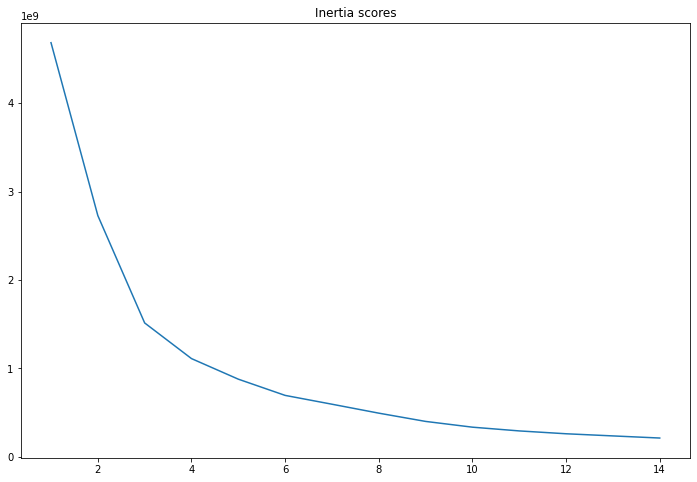

In [56]:
plt.figure(figsize= (12,8))
plt.plot(range(1,15),inertia)
plt.title('Inertia scores')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 6, random_state = 8)
t_df['cluster'] = kmeans.fit_predict(t_df[t_df_col])

In [58]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,impact_col,cluster
91,Elton Chigumbura,213,198,26,4340,117,25.23,5423,80.03,2,0,19,343,106,213,132,4339,4274,101,0.142857,5.91,42.32,42.96,0,0,0.083,1.087165,4
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081,3.924501,2
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,0.303201,0
150,Graeme Cremer,96,70,19,744,58,14.59,1196,62.21,0,0,1,48,5,96,95,4680,3598,119,0.130435,4.61,30.24,39.33,3,0,0.044,0.540765,1
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,100.000000,3


In [59]:
t_df.columns

Index(['name', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'BT_ODI_BR', 'impact_col', 'cluster'],
      dtype='object')

In [60]:
t_df.cluster.value_counts()

3    427
0     85
5     54
1     43
2     17
4      7
Name: cluster, dtype: int64

In [61]:
df_cl1 = t_df[t_df['cluster'] == 0]
df_cl2 = t_df[t_df['cluster'] == 1]
df_cl3 = t_df[t_df['cluster'] == 2]
df_cl4 = t_df[t_df['cluster'] == 3]
df_cl5 = t_df[t_df['cluster'] == 4]
df_cl6 = t_df[t_df['cluster'] == 5]

In [62]:
df_cl3.name.values

array(['Brendan Taylor', 'Mushfiqur Rahim', 'Suresh Raina',
       'Rohit Sharma', 'Tamim Iqbal', 'Eoin Morgan', 'Paul Stirling',
       'Virat Kohli', 'Martin Guptill', 'Aaron Finch', 'David Warner',
       'Steven Smith', 'Kane Williamson', 'Joe Root', 'Babar Azam',
       'Quinton de Kock', 'Shai Hope'], dtype=object)

In [63]:
print(df_cl1.shape,df_cl2.shape,df_cl3.shape,df_cl4.shape,df_cl5.shape,df_cl6.shape)

(85, 28) (43, 28) (17, 28) (427, 28) (7, 28) (54, 28)


In [64]:
def get_df(name):
    for df in [df_cl1,df_cl2,df_cl3,df_cl4,df_cl5,df_cl6]:
        if any(np.isin(df.name.values,name) == True):
            return df
        else:
            pass

def player_recommendation(name):
    recommendation = []
    r_df = get_df(name)
    a = r_df.loc[r_df['name'] == name][t_df_col]
    a = np.array(a)
    for num in r_df.index:
        b = r_df.loc[r_df.index == num][t_df_col]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([r_df.loc[r_df.index == num]['name'],c])
        recommendation.sort(key = lambda a: a[1])
    return [recommendation[1][0].values[0], recommendation[2][0].values[0], recommendation[3][0].values[0], recommendation[4][0].values[0]]

In [65]:
get_df('Virat Kohli')

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,impact_col,cluster
96,Brendan Taylor,205,203,15,6684,145,35.55,8722,76.63,11,0,39,599,106,205,21,396,406,9,0.055556,6.15,45.11,44.00,0,0,0.081,3.924501,2
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,100.000000,2
209,Suresh Raina,226,194,35,5615,116,35.31,6005,93.51,5,0,36,476,120,226,101,2126,1811,36,0.088235,5.11,50.31,59.06,0,0,0.099,1.846904,2
314,Rohit Sharma,235,228,34,9454,264,48.73,10572,89.42,29,3,46,862,256,235,38,593,515,8,0.074074,5.21,64.38,74.12,0,0,0.106,4.103949,2
339,Tamim Iqbal,231,229,11,8074,158,37.04,10265,78.66,14,0,55,890,101,231,2,6,13,0,0.000000,13.00,0.00,0.00,0,0,0.097,19.033166,2
350,Eoin Morgan,248,230,33,7701,148,39.09,8447,91.17,14,0,47,654,220,248,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.103,100.000000,2
499,Paul Stirling,138,136,3,5172,177,38.89,5958,86.81,13,0,26,556,119,138,76,2441,1942,43,0.109091,4.77,45.16,56.77,1,0,0.113,1.744646,2
558,Virat Kohli,265,256,39,12471,183,57.47,13408,93.01,44,0,64,1172,128,265,48,641,665,4,0.066667,6.22,166.25,160.25,0,0,0.097,3.779967,2
596,Martin Guptill,198,195,18,7346,237,41.50,8414,87.31,18,1,39,751,187,198,12,109,98,4,0.333333,5.39,24.50,27.25,0,0,0.111,7.501416,2
640,Aaron Finch,146,142,3,5406,153,38.89,6163,87.72,17,0,30,533,129,146,21,284,259,4,0.500000,5.47,64.75,71.00,0,0,0.107,3.999437,2


In [66]:
player_recommendation('Virat Kohli')

['Rohit Sharma', 'Tamim Iqbal', 'Eoin Morgan', 'Martin Guptill']

In [67]:
import pickle

with open('odi_player.pkl', 'wb') as f:
    pickle.dump(player_recommendation, f)

In [68]:
pl_list = ['Rohit Sharma','David Warner','Jos Buttler','Virat Kohli','Ben Stokes','Ravindra Jadeja',
           'Rashid Khan','Jasprit Bumrah','Mohammed Siraj','Hardik Pandya','Kagiso Rabada']

def team_recom(pl_list):
    opp_list = []

    for x in pl_list:
        new_pls = player_recommendation(x)
        if ((new_pls[0] not in opp_list) and (new_pls[0] not in pl_list)):
            opp_list.append(new_pls[0])
        elif ((new_pls[1] not in opp_list) and (new_pls[1] not in pl_list)):
            opp_list.append(new_pls[1])
        elif ((new_pls[2] not in opp_list) and (new_pls[2] not in pl_list)):
            opp_list.append(new_pls[2])
        else:
            opp_list.append(new_pls[3])
    return opp_list

In [69]:
team_recom(pl_list)

['Tamim Iqbal',
 'Quinton de Kock',
 'Jason Roy',
 'Eoin Morgan',
 'Glenn Maxwell',
 'Elton Chigumbura',
 'Mitchell Santner',
 'Josh Hazlewood',
 'Usman Shinwari',
 'James Neesham',
 'Kemar Roach']

In [70]:
with open('odi_team.pkl', 'wb') as f:
    pickle.dump(team_recom, f)